In [1]:
from IPython.display import Image

# 문제 설명

* 네오는 평소 프로도가 비상금을 숨겨놓는 장소를 알려줄 비밀지도를 손에 넣었다. 그런데 이 비밀지도는 숫자로 암호화되어 있어 위치를 확인하기 위해서는 암호를 해독해야 한다. 다행히 지도 암호를 해독할 방법을 적어놓은 메모도 함께 발견했다.
    * 1. 지도는 한 변의 길이가 n인 정사각형 배열 형태로, 각 칸은 "공백"(" ") 또는 "벽"("#") 두 종류로 이루어져 있다.
    * 2. 전체 지도는 두 장의 지도를 겹쳐서 얻을 수 있다. 각각 "지도 1"과 "지도 2"라고 하자. 지도 1 또는 지도 2 중 어느 하나라도 벽인 부분은 전체 지도에서도 벽이다. 지도 1과 지도 2에서 모두 공백인 부분은 전체 지도에서도 공백이다.
    * 3. "지도 1"과 "지도 2"는 각각 정수 배열로 암호화되어 있다.
    * 4. 암호화된 배열은 지도의 각 가로줄에서 벽 부분을 1, 공백 부분을 0으로 부호화했을 때 얻어지는 이진수에 해당하는 값의 배열이다.

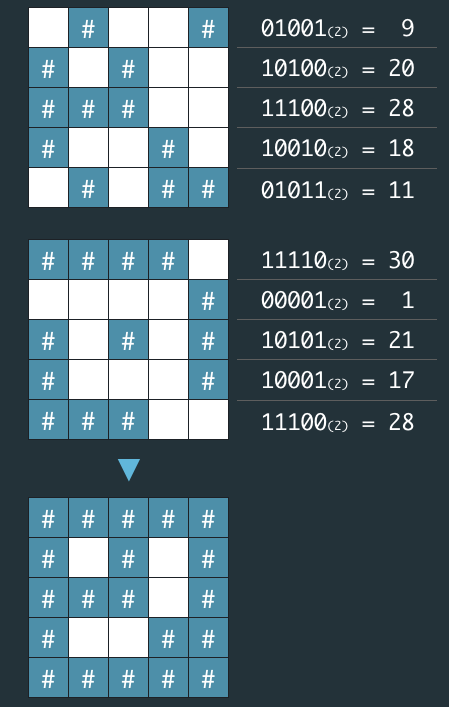

In [2]:
Image('./secret8.png')

* 네오가 프로도의 비상금을 손에 넣을 수 있도록, 비밀지도의 암호를 해독하는 작업을 도와줄 프로그램을 작성하라.

# 입력 형식

* 입력으로 지도의 한 변 크기 n 과 2개의 정수 배열 arr1, arr2가 들어온다.
    * 1 ≦ n ≦ 16
    * arr1, arr2는 길이 n인 정수 배열로 주어진다.
    * 정수 배열의 각 원소 x를 이진수로 변환했을 때의 길이는 n 이하이다. 즉, 0 ≦ x ≦ 2n - 1을 만족한다.

# 출력 형식

* 원래의 비밀지도를 해독하여 '#', 공백으로 구성된 문자열 배열로 출력하라.

# 입출력 예시

|매개변수|값|
|---|---|
|n|5|
|arr1|[9, 20, 28, 18, 11]|
|arr2|[30, 1, 21, 17, 28]|
|출력|["#####","# # #", "### #", "# ##", "#####"]|

|매개변수|값|
|---|---|
|n|6|
|arr1|[46, 33, 33 ,22, 31, 50]|
|arr2|[27 ,56, 19, 14, 14, 10]|
|출력|["######", "### #", "## ##", " #### ", " #####", "### # "]|

In [3]:
def num_converter(number, num_to):
    cvt_num = ''
    while number > 0:
        tail = number % num_to
        cvt_num = str(tail) + cvt_num
        number = number // num_to
    return cvt_num
    
def solution(n, arr1, arr2):
    cvt_arr1, cvt_arr2 = [], []
    for a_1, a_2 in zip(arr1, arr2):
        cvt_a_1, cvt_a_2 = num_converter(a_1, 2), num_converter(a_2, 2)
        if len(cvt_a_1) < n:
            cvt_a_1 = ('0' * (n - len(cvt_a_1))) + cvt_a_1
        
        if len(cvt_a_2) < n:
            cvt_a_2 = ('0' * (n - len(cvt_a_2))) + cvt_a_2
        cvt_arr1.append(cvt_a_1)
        cvt_arr2.append(cvt_a_2)

    final_map = []
    for c_a_1, c_a_2 in zip(cvt_arr1, cvt_arr2):
        map = ''
        for e_a_1, e_a_2 in zip(c_a_1, c_a_2):
            if (e_a_1 == '1') or (e_a_2 == '1'):
                map += '#'
            else:
                map += ' '
        final_map.append(map)
    
    answer = final_map
    return answer

In [4]:
for n, arr1, arr2 in [[5, [9, 20, 28, 18, 11], [30, 1, 21, 17, 28]],
                      [6, [46, 33, 33 ,22, 31, 50], [27 ,56, 19, 14, 14, 10]]]:
    print(solution(n, arr1, arr2))

['#####', '# # #', '### #', '#  ##', '#####']
['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']


# 풀이 과정 및 주의사항

* 숫자를 해당 진법의 숫자로(ex. 2진법이면 2로) 계속 나누어 나머지를 앞에 하나씩 쌓아 10진법을 해당 진법으로 변환한다.(10진법 이하만 가능, 10진법 이후는 A,B,C,D...를 사용하기 때문)
* 해당 문제는 2진법으로 변환하는 문제이므로 각각의 숫자를 2진법으로 변환 후 각각의 List에 저장한다.
* 이중 for문을 사용하여 각 2진법 숫자의 요소 중 하나라도 1이 있으면 #를 더해주고, 둘 다 0인경우 공백을 넣은 후 정답을 반환한다.

https://school.programmers.co.kr/learn/courses/30/lessons/17681